# Note

1.　関数

2.　科学計算ライブラリScipy

# 関数

関数は以下のようにして定義する

## 関数の例

$\sin^2(x)$ を返す関数を定義する。

In [1]:
import numpy as np

def sin_square(x):
    sin = np.sin(x)
    sin2 = sin*sin
    return sin2

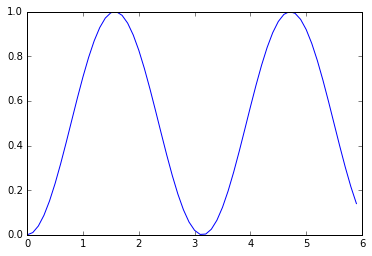

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

x = np.arange(0, 6, 0.1)

# for ループを一行で書く方法
y = [sin_square(x1) for x1 in x]

plt.plot(x, y)

## 宿題1 - Lorentz 関数を返す関数 - 

以下のLorentz関数 
$$
L(x| A, x_0, \gamma) = A\frac{\gamma}{1 + \left(\frac{x-x_0}{\gamma}\right)^2}
$$
を作って描画する

# Scipy

科学計算で使う機能を提供するライブラリ。

ここでは、最小二乗近似(scipy.optimize.leastsq)、最小化（scipy.optimize.minimize）を使ってみる。

仕様（

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.leastsq.html

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.minimize.html

）を参照すること。


In [3]:
# ライブラリのインポート
import scipy.optimize

## テストデータの読み込み・描画

ファイル
tutorial3_files/x_lorentz.txt
tutorial3_files/y_lorentz.txt
を読み込む。
それぞれ、コンマで区切られたテキストファイルである。

In [4]:
# データの読み込み
x_lorentz = np.loadtxt("tutorial3_files/x_lorentz.txt")
y_lorentz = np.loadtxt("tutorial3_files/y_lorentz.txt")

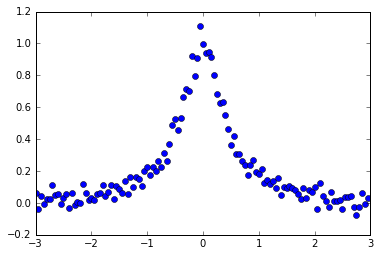

In [5]:
# 描画
plt.plot(x_lorentz, y_lorentz, 'o')

## scipy.optimize.leastsq を用いたフィッティング

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.leastsq.html

http://www2.kaiyodai.ac.jp/~kentaro/materials/new_HP/python/15fit_data3.html

などを参考にする。

まず、各xにおいて、近似値（Lorentz関数）と計測データ（上記の青丸データ）の差をnp.arrayで返す関数を定義する。

In [6]:
# parameters : 求めたいパラメータ。今回の場合はLorentz関数の形を定義する A， x０，γ とオフセットy0
def Lorentz_res(parameters, x, y):
    A = parameters[0]
    x0 = parameters[1]
    gamma = parameters[2]
    y0 = parameters[3]
    
    return y - (np.ones(len(x)) * y0 + A * gamma / (1.0 + ((x-np.ones(len(x))*x0)/gamma)**2.0))

パラメータの初期値を指定する

In [7]:
param_init = [1.0, 0.1, 0.4, 0.1]

フィッティングを実行する

In [8]:
result = scipy.optimize.leastsq(Lorentz_res,param_init,args=(x_lorentz,y_lorentz))

In [9]:
result

(array([  2.18882115e+00,  -1.51703585e-02,   4.51209347e-01,
         -1.92376834e-05]), 1)

In [10]:
A = result[0][0]
x0 = result[0][1]
gamma = result[0][2]
y0 = result[0][3]

y_fit = (np.ones(len(x_lorentz)) * y0 + A * gamma / (1.0 + ((x_lorentz-np.ones(len(x_lorentz))*x0)/gamma)**2.0))

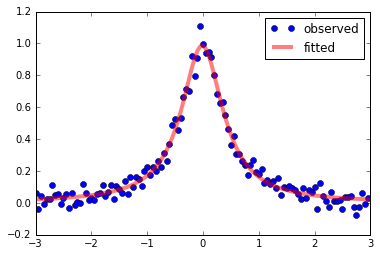

In [11]:
# 描画
plt.plot(x_lorentz, y_lorentz, 'o', label="observed")
plt.plot(x_lorentz, y_fit, 'r', alpha=0.5, linewidth=4.0, label="fitted")
plt.legend()

## 宿題2

データ

tutorial3_files/x_gauss.txt

tutorial3_files/y_gauss.txt

をガウス関数
$$
{\mathcal G}(x | A, x_0, \sigma, y_0) = y_0 + \frac{A}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x-x_0)^2}{2w^2}\right)
$$
でフィッティングする。

今回は、

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.minimize.html

http://oppython.hatenablog.com/entry/2015/09/28/222920

などを参考にして
scipy.optimize.minimize
を使ってデータを最も再現する$A, x_0, \sigma, y_0$ を求める。


フィッティング曲線と、データ点を描画するとともに、グラフ内に
求めた
$A, x_0, \sigma, y_0$
を記載する。